In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
#import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
#from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
# from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
sample_size = 10;
simulated_data = np.mean(tf.random.uniform([10_000, sample_size], 0,1),axis = 1);
simulated_data.shape

(10000,)

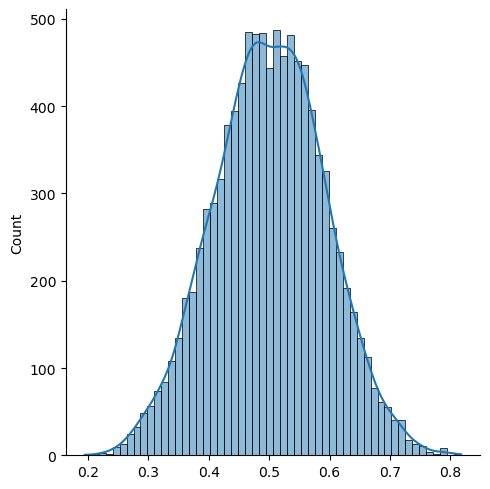

In [3]:
sn.displot(simulated_data, kde=True)

Central limit theorem is why this plot appears to be normally distributed.
Standard error is $\frac{\sigma}{\sqrt{n}}$.

In [4]:
size = 30; mean = 18;

# sample drawn from a normal distribution with mean 15; std. 5
sim_data = np.mean(tf.random.normal([10_000, size],
                    mean = 15, stddev = 5), axis =1);

We need to calculate how likely it is that 

In [6]:
np.sum(sim_data > 18)/len(sim_data)

0.0006

Likelihood of observing outcome where $\mu=18$: $0.3\%$ 

# Bootstrapping

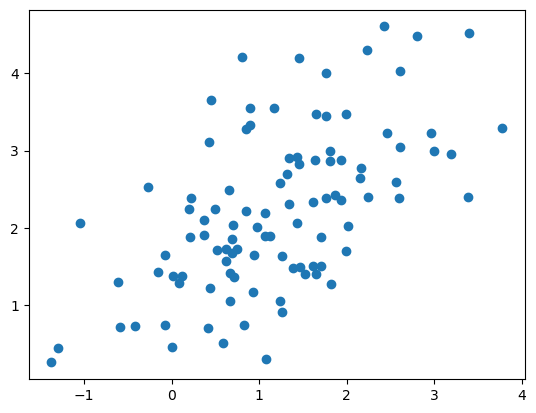

In [7]:
mean = [1,2];
cov = [ [1,0.6],
        [0.6,1]]; # covariance matrix
n = 100;
x = np.random.multivariate_normal(mean, cov, size = (n));

plt.scatter(x[:,0], x[:,1]);

In [8]:
sm.OLS(x[:,1], sm.add_constant(x[:,0])).fit().params

array([1.52170308, 0.58888732])

In [9]:
slopes = [];
for i in np.arange(100):
    sample = np.random.choice(n, size=n, replace=True)
    slopes.append(sm.OLS(x[:,1][sample], sm.add_constant(x[:,0][sample])).fit().params[1])

In [18]:
print(np.mean(slopes))

0.5886459057706873


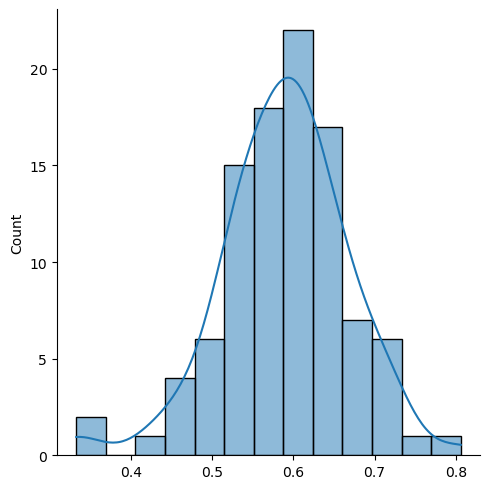

In [10]:
sn.displot(slopes, kde=True)

Program null hypothesis test where mean=0

In [13]:
slopes_0 = []

for i in np.arange(100):
    sample_x = np.random.choice(n, size=n, replace=True)
    sample_y = np.random.choice(n, size=n, replace=True)
    slopes_0.append(sm.OLS(x[:,1][sample_y], sm.add_constant(x[:,0][sample_x])).fit().params[1])

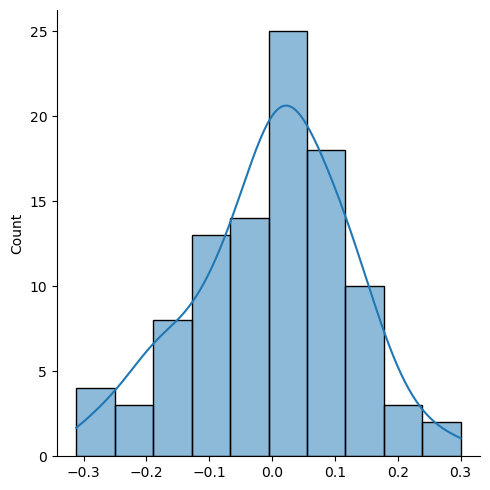

In [14]:
sn.displot(slopes_0, kde=True)

In [19]:
np.mean(np.array(slopes_0) > 0.7)

0.0

$0.7$ is the slope parameter we got from OLS earlier on. I got 0.58 as average slope

# Jellybean problem simulation

None of the variables will be related in this data generating process.

In [22]:
nobs = 100;
X = np.random.random((nobs,20));
X = sm.add_constant(X); # since there is beta0 without a variable
beta = np.zeros(21);
e = np.random.random(nobs);
y = np.dot(X, beta) + e;

$y=X\beta + \varepsilon$

In [23]:
results = sm.OLS(y,X).fit()
np.sum(results.pvalues<0.05)

1

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.5678
Date:                Thu, 08 Feb 2024   Prob (F-statistic):              0.923
Time:                        12:11:53   Log-Likelihood:                -6.2028
No. Observations:                 100   AIC:                             54.41
Df Residuals:                      79   BIC:                             109.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6815      0.247      2.759      0.007       0.190       1.173
x1            -0.0180      0.103     -0.175      0.862      -0.223       0.187
x2            -0.1552      0.121     -1.286      0.202      -0.395       0.085
x3            -0.0654      0.098     -0.665      0.508      -0.261       0.130
x4            -0.0251      0.125     -0.201      0.841      -0.275       0.224
x5             0.1623      0.119      1.360      0.178      -0.075       0.400
x6             0.0339      0.113      0.299      0.766      -0.192       0.260
x7            -0.1423      0.110     -1.298      0.198      -0.361       0.076
x8             0.0612      0.122      0.504      0.616      -0.181       0.303
x9             0.0985      0.114      0.866      0.389      -0.128       0.325
x10            0.0213      0.107      0.199      0.843      -0.192       0.234
x11           -0.0243      0.119     -0.205      0.838      -0.261       0.212
x12           -0.0725      0.097     -0.750      0.456      -0.265       0.120
x13           -0.0180      0.111     -0.162      0.872      -0.239       0.203
x14            0.0502      0.112      0.448      0.656      -0.173       0.273
x15           -0.0514      0.110     -0.469      0.641      -0.270       0.167
x16           -0.0572      0.117     -0.491      0.625      -0.289       0.175
x17            0.0641      0.121      0.528      0.599      -0.178       0.306
x18           -0.0729      0.120     -0.607      0.546      -0.312       0.166
x19           -0.0017      0.110     -0.015      0.988      -0.220       0.217
x20           -0.1579      0.121     -1.310      0.194      -0.398       0.082
==============================================================================
Omnibus:                        5.475   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                2.922
Skew:                          -0.173   Prob(JB):                        0.232
Kurtosis:                       2.237   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([0.22, 0.35, 0.21, 0.13, 0.06, 0.02, 0.01]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

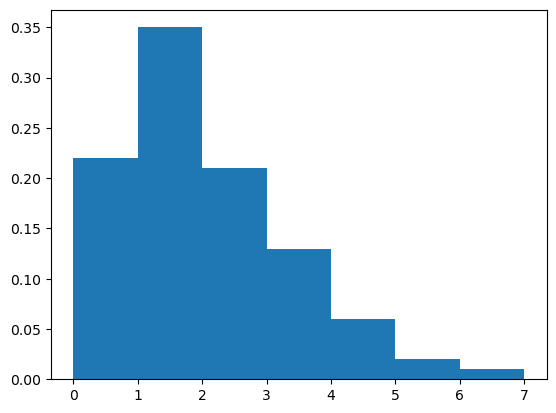

In [26]:
signif_variables = [];

for i in range(100):
    X = np.random.random((nobs,20));
    X = sm.add_constant(X); # since there is beta0 without a variable
    beta = np.zeros(21);
    e = np.random.random(nobs);
    y = np.dot(X, beta) + e;
    results = sm.OLS(y,X).fit();
    signif_variables.append(np.sum(results.pvalues<0.05));

plt.hist(signif_variables,bins=7, density=True)

Up to seven variables can be found to be correlated despite not being related at all

# Matrices in Python

In [27]:
A = np.array([
    [1,2],
    [3,4]
]);
A

array([[1, 2],
       [3, 4]])

In [28]:
b = np.array([
    [3,5]
]).reshape(2,1)
c = np.array([
    [3,5]
]).reshape(1,2)

In [29]:
b

array([[3],
       [5]])

In [30]:
c

array([[3, 5]])

In [31]:
np.dot(A,b)

array([[13],
       [29]])

In [38]:
A@b # Use @ for matrix multiplication, * for elementwise multiplication

array([[13],
       [29]])